In [70]:
%matplotlib inline

In [71]:
from __future__ import division
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
from collections import OrderedDict
from scipy.stats import norm
Z = norm.ppf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

In [72]:
import os
from os.path import expanduser

In [73]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/behav4/'

In [74]:
dataSheets45c = [dataDirectory + 's1/runData/run1_2016_Jul_08_1326.csv', dataDirectory + 's2/runData/run2_2016_Jul_08_1453.csv', dataDirectory + 's3/runData/run3_2016_Jul_08_1614.csv']

In [75]:
dataSheets45uc = [dataDirectory + 's1/runData/run3_2016_Jul_08_1404.csv', dataDirectory + 's2/runData/run1_2016_Jul_08_1434.csv', dataDirectory + 's3/runData/run2_2016_Jul_08_1555.csv']

In [76]:
dataSheets30c = [dataDirectory + 's1/runData/run2_2016_Jul_08_1345.csv', dataDirectory + 's2/runData/run3_2016_Jul_08_1512.csv', dataDirectory + 's3/runData/run1_2016_Jul_08_1535.csv']

In [77]:
testRuns45c = [(1,1), (2,2), (3,3)]

In [78]:
testRuns45uc = [(1,3), (2,1), (3,2)]

In [79]:
testRuns30c = [(1,2), (2,3), (3,1)]

In [80]:
subjRunCount = OrderedDict()
for run in testRuns:
    subjRunCount[str(run[0])] = 0
for run in testRuns:
    subjRunCount[str(run[0])] += 1

In [81]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [82]:
# counts number of trials corresponding to inputted conditions
def itemCounter(df, responseType, changeType, t, d):
    count = float(len(df[responseType & changeType & t & d]))
    return count

In [83]:
# calculates K pased on Pashler equation: K = S * ((H - F) / (1 - F))
def kCalculation(s, h, f):
    k = s * ((h - f) / (1 - f))
    return k

In [84]:
def pashlerK(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionaries
    hitRates = OrderedDict()
    fAlarmRates = OrderedDict()
    Kvals = OrderedDict()
    
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # store rate values
    for key in conds:
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        hitRates[key] = hits/(hits+misses)
        fAlarmRates[key] = falarms/(falarms+crejects)
        s = 0
        if key == 't2d0' or key == 't2d2' or key == 't2d4':
            s = 2
        else:
            s = 4
        Kvals[key] = kCalculation(s, hitRates[key], fAlarmRates[key])
    return {'Kvals': Kvals, 'hitRates': hitRates, 'fAlarmRates': fAlarmRates}

In [85]:
def rtCalc(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionary
    RTRates = OrderedDict()
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate average RT value
    for key in conds:
        rows = df[conds[key][0] & conds[key][1] & resps]
        rts = rows['RT']
        meanRT = rts.mean()
        RTRates[key] = meanRT
    return RTRates

In [94]:
def dprime(csv):
     # read in csv file
    df = pd.read_csv(csv)
    
    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4
    
    # initialize dict
    hits = OrderedDict()
    misses = OrderedDict()
    falarms = OrderedDict()
    crejects = OrderedDict()
    dprimes = OrderedDict()
      
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate d-primes for each condition
    for key in conds:   
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        
        # Floors an ceilings are replaced by half hits and half FA's
        halfHit = 0.5/(hits+misses)
        halfFa = 0.5/(falarms+crejects)
 
        # Calculate hitrate and avoid d' infinity
        hitRate = hits/(hits+misses)
        if hitRate == 1: hitRate = 1-halfHit
        if hitRate == 0: hitRate = halfHit

        # Calculate false alarm rate and avoid d' infinity
        faRate = falarms/(falarms+crejects)
        if faRate == 1: faRate = 1-halfFa
        if faRate == 0: faRate = halfFa
        
        # calculate dprime using Z (ppf function in scipy.norm)
        dprimes[key]= Z(hitRate) - Z(faRate)
    
    return dprimes

In [95]:
Kvals45c = []
hitRates45c = []
faRates45c = []

for sheet in dataSheets45c:
    Kvals45c.append(pashlerK(sheet)['Kvals'])
    hitRates45c.append(pashlerK(sheet)['hitRates'])
    faRates45c.append(pashlerK(sheet)['fAlarmRates'])

In [102]:
Kvals45uc = []
hitRates45uc = []
faRates45uc = []

for sheet in dataSheets45uc:
    Kvals45uc.append(pashlerK(sheet)['Kvals'])
    hitRates45uc.append(pashlerK(sheet)['hitRates'])
    faRates45uc.append(pashlerK(sheet)['fAlarmRates'])
    
Kchart45uc = pd.DataFrame(Kvals45uc, index=testRuns45uc, columns=conds.keys())
Kchart45uc

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 3)",1.818182,1.617021,2.000000,2.833333,3.135135,2.727273
"(2, 1)",1.900000,1.650000,1.523810,1.454545,2.111111,2.526316
"(3, 2)",1.523810,0.933333,1.272727,2.666667,2.181818,1.523810


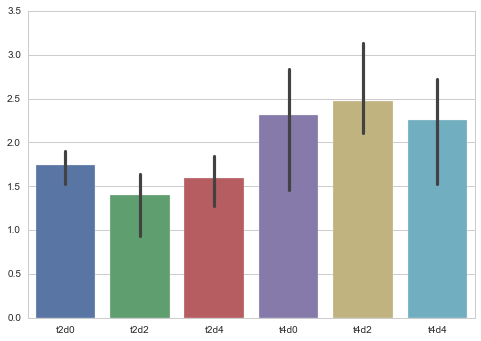

In [104]:
sns.barplot(data=Kchart45uc)

In [103]:
Kvals30c = []
hitRates30c = []
faRates30c = []

for sheet in dataSheets30c:
    Kvals30c.append(pashlerK(sheet)['Kvals'])
    hitRates30c.append(pashlerK(sheet)['hitRates'])
    faRates30c.append(pashlerK(sheet)['fAlarmRates'])
    
Kchart30c = pd.DataFrame(Kvals30c, index=testRuns30c, columns=conds.keys())
Kchart30c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 2)",0.727273,1.458333,1.272727,2.086957,2.117647,1.818182
"(2, 3)",1.428571,1.454545,1.052632,1.818182,1.052632,0.800000
"(3, 1)",0.900000,0.954545,1.000000,2.000000,1.142857,0.000000


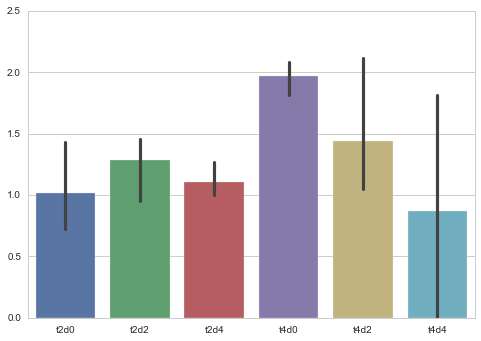

In [105]:
sns.barplot(data=Kchart30c)

In [98]:
Kchart45c = pd.DataFrame(Kvals45c, index=testRuns45c, columns=conds.keys())
Kchart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",1.818182,1.872340,1.700000,3.040000,3.000000,2.666667
"(2, 2)",1.714286,1.695652,1.545455,2.363636,2.057143,2.666667
"(3, 3)",1.428571,0.954545,1.300000,2.434783,0.533333,1.555556


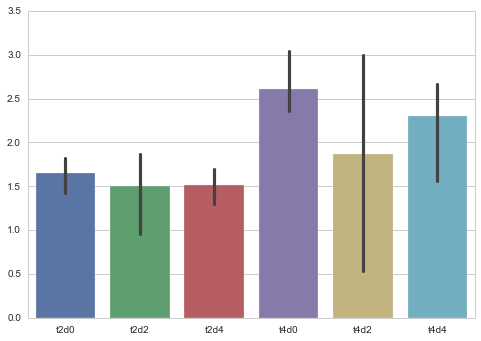

In [106]:
sns.barplot(data=Kchart45c)

In [99]:
hitChart45c = pd.DataFrame(hitRates45c, index=testRuns45c, columns=conds.keys())
hitChart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.909091,0.937500,0.863636,0.76,0.809524,0.72
"(2, 2)",0.863636,0.854167,0.772727,0.64,0.595238,0.68
"(3, 3)",0.727273,0.520833,0.681818,0.64,0.380952,0.56


In [100]:
faChart45c = pd.DataFrame(faRates45c, index=testRuns45c, columns=conds.keys())
faChart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.000000,0.020833,0.090909,0.00,0.238095,0.16
"(2, 2)",0.045455,0.041667,0.000000,0.12,0.166667,0.04
"(3, 3)",0.045455,0.083333,0.090909,0.08,0.285714,0.28


In [101]:
kSubjMeans = []
index = 0
for subj in subjRunCount.keys():
    kSubjMeans.append(Kchart[index:index+subjRunCount[subj]].mean())
    index += subjRunCount[subj]
kSubjMeans

kSubjMeanChart = pd.DataFrame(kSubjMeans, index=subjRunCount.keys(), columns=conds.keys())
kSubjMeanChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,1.753247,1.677536,1.587302,2.585231,2.396159,1.968831
2,1.787879,1.873522,1.781818,3.013730,3.231217,3.142300
3,2.000000,1.985185,2.000000,3.381643,3.476756,3.601449


In [19]:
hitSubjMeans = []
index = 0
for subj in subjRunCount.keys():
    hitSubjMeans.append(hitChart[index:index+subjRunCount[subj]].mean())
    index += subjRunCount[subj]
hitSubjMeans

hitSubjMeanChart = pd.DataFrame(hitSubjMeans, index=subjRunCount.keys(), columns=conds.keys())
hitSubjMeanChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.878788,0.840278,0.803030,0.680000,0.634921,0.546667
2,0.893939,0.937500,0.893939,0.786667,0.841270,0.840000
3,1.000000,0.993056,1.000000,0.880000,0.873016,0.906667
4,1.000000,0.968750,1.000000,0.880000,0.773810,0.680000


In [20]:
faSubjMeans = []
index = 0
for subj in subjRunCount.keys():
    faSubjMeans.append(faChart[index:index+subjRunCount[subj]].mean())
    index += subjRunCount[subj]
faSubjMeans

faSubjMeanChart = pd.DataFrame(faSubjMeans, index=subjRunCount.keys(), columns=conds.keys())
faSubjMeanChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.015152,0.013889,0.045455,0.093333,0.087302,0.093333
2,0.000000,0.027778,0.030303,0.120000,0.182540,0.253333
3,0.060606,0.027778,0.015152,0.160000,0.031746,0.066667
4,0.022727,0.041667,0.113636,0.060000,0.083333,0.160000


In [27]:
kMeans = []
kMeanArray = ["K Value Mean"]
hitMeans = []
hitMeanArray = ["Hit Rate Mean"]
faMeans = []
faMeanArray = ["FA Rate Mean"]

for key in conds:
    kMeans.append(Kchart[key].mean())
    hitMeans.append(hitChart[key].mean())
    faMeans.append(faChart[key].mean())

In [28]:
kMeanChart = pd.DataFrame(kMeans, index=conds.keys(), columns=kMeanArray)
kMeanChart

,K Value Mean
t2d0,1.874852
t2d2,1.861744
t2d4,1.827942
t4d0,3.081322
t4d2,3.030853
t4d4,2.826375


In [29]:
hitMeanChart = pd.DataFrame(hitMeans, index=conds.keys(), columns=hitMeanArray)
hitMeanChart

,Hit Rate Mean
t2d0,0.938017
t2d2,0.931818
t2d4,0.917355
t4d0,0.800000
t4d2,0.781385
t4d4,0.749091


In [30]:
faMeanChart = pd.DataFrame(faMeans, index=conds.keys(), columns=faMeanArray)
faMeanChart

,FA Rate Mean
t2d0,0.024793
t2d2,0.026515
t2d4,0.045455
t4d0,0.112727
t4d2,0.097403
t4d4,0.141818


In [109]:
RTvals45c = []

for sheet in dataSheets45c:
    RTvals45c.append(rtCalc(sheet))

RTchart45c = pd.DataFrame(RTvals45c, index=testRuns45c, columns=conds.keys())
RTchart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.574747,0.572350,0.644610,0.627789,0.618730,0.562695
"(2, 2)",0.722870,0.693994,0.784007,0.723869,0.707966,0.796429
"(3, 3)",0.584385,0.584791,0.635360,0.581585,0.620637,0.553202


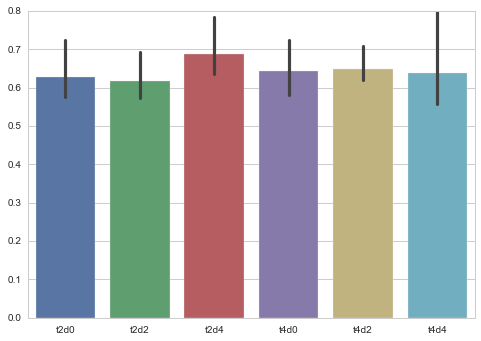

In [112]:
sns.barplot(data=RTchart45c)

In [110]:
RTvals45uc = []

for sheet in dataSheets45uc:
    RTvals45uc.append(rtCalc(sheet))

RTchart45uc = pd.DataFrame(RTvals45uc, index=testRuns45uc, columns=conds.keys())
RTchart45uc

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 3)",0.508622,0.526160,0.580501,0.532159,0.578542,0.594394
"(2, 1)",0.773095,0.772773,0.803784,0.877950,0.864367,0.841620
"(3, 2)",0.581511,0.592442,0.582520,0.633583,0.544039,0.557774


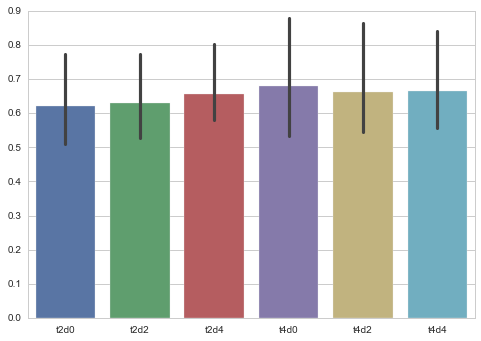

In [113]:
sns.barplot(data=RTchart45uc)

In [111]:
RTvals30c = []

for sheet in dataSheets30c:
    RTvals30c.append(rtCalc(sheet))

RTchart30c = pd.DataFrame(RTvals30c, index=testRuns30c, columns=conds.keys())
RTchart30c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 2)",0.513881,0.547409,0.585790,0.536963,0.573434,0.651079
"(2, 3)",0.715562,0.695718,0.767225,0.782107,0.795750,0.758134
"(3, 1)",0.623195,0.680713,0.720138,0.622263,0.694311,0.676851


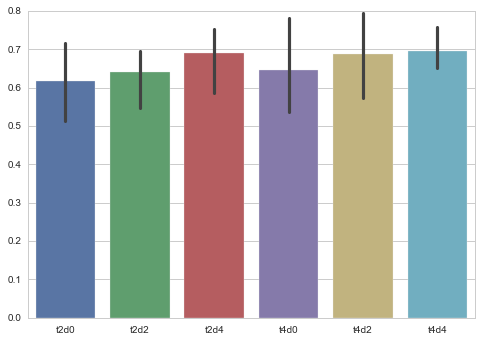

In [114]:
sns.barplot(data=RTchart30c)

In [32]:
rtSubjMeans = []
index = 0
for subj in subjRunCount.keys():
    rtSubjMeans.append(RTchart[index:index+subjRunCount[subj]].mean())
    index += subjRunCount[subj]

rtSubjMeanChart = pd.DataFrame(rtSubjMeans, index=subjRunCount.keys(), columns=conds.keys())
rtSubjMeanChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.665072,0.667985,0.684072,0.694717,0.714754,0.684609
2,0.497482,0.517131,0.511526,0.548096,0.549750,0.591466
3,0.501411,0.519883,0.531617,0.562029,0.574005,0.598451
4,0.491929,0.549255,0.569890,0.629236,0.644616,0.655324


In [33]:
rtMeanArray = ["RT Mean"]

rtMeans = []

for key in conds:
    rtMeans.append(RTchart[key].mean())
    
rtMeanChart = pd.DataFrame(rtMeans, index=conds.keys(), columns=rtMeanArray)
rtMeanChart

,RT Mean
t2d0,0.543251
t2d2,0.564864
t2d4,0.574675
t4d0,0.606636
t4d2,0.618614
t4d4,0.630384


In [115]:
dPrimes45c = []

for sheet in dataSheets45c:
    dPrimes45c.append(dprime(sheet))

dpChart45c = pd.DataFrame(dPrimes45c, index=testRuns45c, columns=conds.keys())
dpChart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",3.335601,3.570955,2.431981,2.760051,1.588586,1.577299
"(2, 2)",2.787425,2.786137,2.748282,1.533446,1.208462,2.218385
"(3, 3)",2.295207,1.435239,1.807967,1.763530,0.262968,0.733811


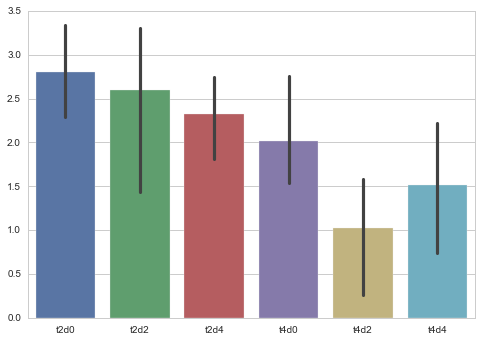

In [118]:
sns.barplot(data=dpChart45c)

In [116]:
dPrimes45uc = []

for sheet in dataSheets45uc:
    dPrimes45uc.append(dprime(sheet))

dpChart45uc = pd.DataFrame(dPrimes45uc, index=testRuns45uc, columns=conds.keys())
dpChart45uc

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 3)",3.335601,2.923981,4.000847,2.333528,2.055904,1.757828
"(2, 1)",3.025799,2.021894,2.438480,1.024018,1.308611,1.289144
"(3, 2)",2.438480,1.534121,2.349179,1.289144,1.157745,0.944304


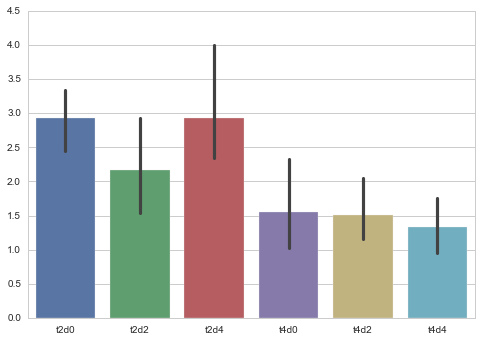

In [119]:
sns.barplot(data=dpChart45uc)

In [117]:
dPrimes30c = []

for sheet in dataSheets30c:
    dPrimes30c.append(dprime(sheet))

dpChart30c = pd.DataFrame(dPrimes30c, index=testRuns30c, columns=conds.keys())
dpChart30c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 2)",1.651668,2.921286,2.349179,1.556041,1.179123,1.225140
"(2, 3)",2.295207,2.057484,1.326688,1.225140,0.878444,0.483162
"(3, 1)",1.335178,1.435239,1.449363,0.941300,0.490444,0.000000


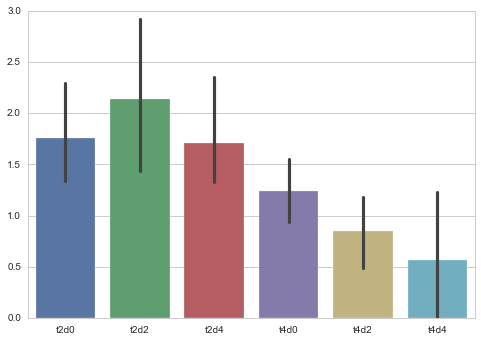

In [120]:
sns.barplot(data=dpChart30c)

In [35]:
dpSubjMeans = []
index = 0
for subj in subjRunCount.keys():
    dpSubjMeans.append(dpChart[index:index+subjRunCount[subj]].mean())
    index += subjRunCount[subj]

dpSubjMeanChart = pd.DataFrame(dpSubjMeans, index=subjRunCount.keys(), columns=conds.keys())
dpSubjMeanChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,3.073418,3.135958,2.554795,1.900002,1.731733,1.527217
2,3.335652,3.611364,3.034395,2.089708,1.938556,1.668838
3,3.557350,4.180254,3.897580,2.362911,3.054177,2.887163
4,3.845946,3.669727,3.374565,2.814133,2.139244,1.474283


In [36]:
dpMeanArray = ["d' Mean"]

dpMeans = []

for key in conds:
    dpMeans.append(dpChart[key].mean())
    
dpMeanChart = pd.DataFrame(dpMeans, index=conds.keys(), columns=dpMeanArray)
dpMeanChart

,d' Mean
t2d0,3.417377
t2d2,3.647471
t2d4,3.200858
t4d0,2.244193
t4d2,2.222898
t4d4,1.927111


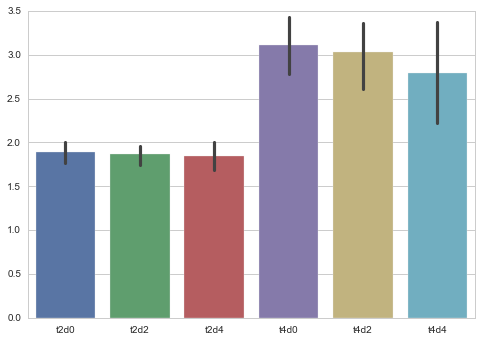

In [43]:
sns.barplot(data=kSubjMeanChart)

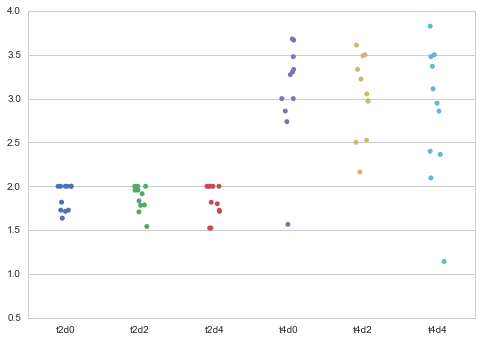

In [44]:
sns.stripplot(data=Kchart, jitter=True)

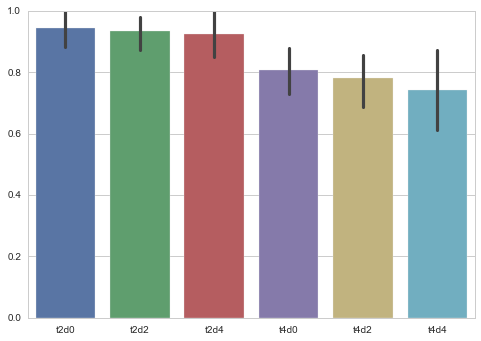

In [45]:
sns.barplot(data = hitSubjMeanChart)

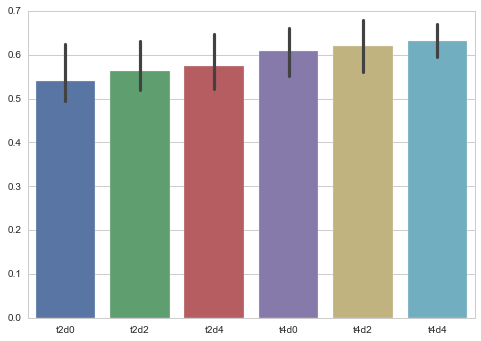

In [46]:
sns.barplot(data = rtSubjMeanChart)

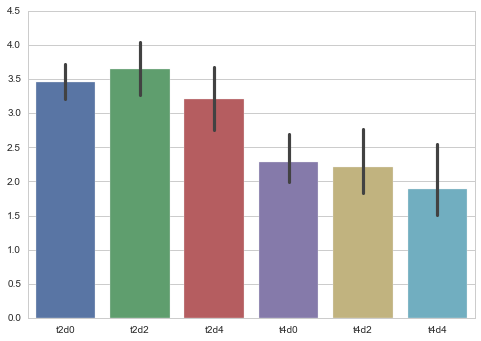

In [49]:
sns.barplot(data = dpSubjMeanChart)

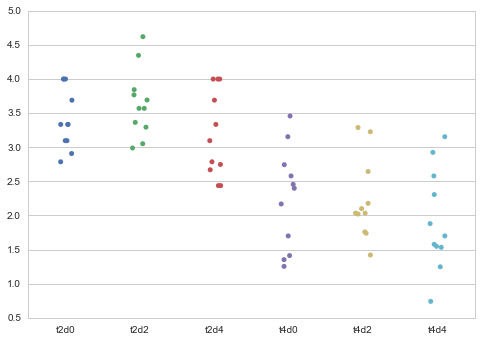

In [42]:
sns.stripplot(data=dpChart, jitter=True)

In [136]:
hitChart30c = pd.DataFrame(hitRates30c, index=testRuns30c, columns=conds.keys())
hitChart30c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 2)",0.363636,0.729167,0.636364,0.56,0.619048,0.52
"(2, 3)",0.727273,0.750000,0.590909,0.52,0.333333,0.36
"(3, 1)",0.500000,0.520833,0.545455,0.64,0.523810,0.40


In [137]:
hitChart45c = pd.DataFrame(hitRates45c, index=testRuns45c, columns=conds.keys())
hitChart45c

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 1)",0.909091,0.937500,0.863636,0.76,0.809524,0.72
"(2, 2)",0.863636,0.854167,0.772727,0.64,0.595238,0.68
"(3, 3)",0.727273,0.520833,0.681818,0.64,0.380952,0.56


In [138]:
hitChart45uc = pd.DataFrame(hitRates45uc, index=testRuns45uc, columns=conds.keys())
hitChart45uc

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
"(1, 3)",0.909091,0.812500,1.000000,0.72,0.809524,0.72
"(2, 1)",0.954545,0.854167,0.772727,0.44,0.595238,0.72
"(3, 2)",0.772727,0.500000,0.636364,0.76,0.642857,0.48


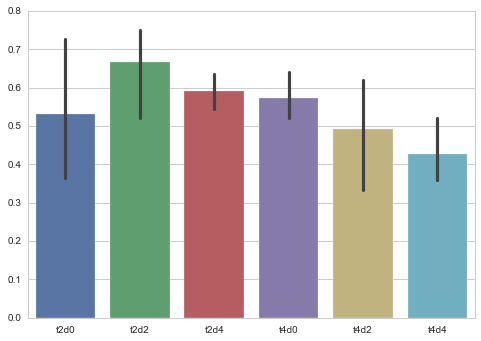

In [139]:
sns.barplot(data=hitChart30c)

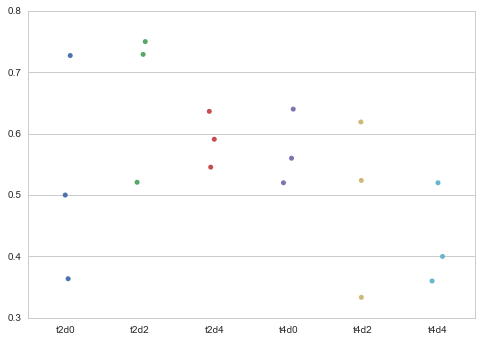

In [140]:
sns.stripplot(data=hitChart30c, jitter=True)

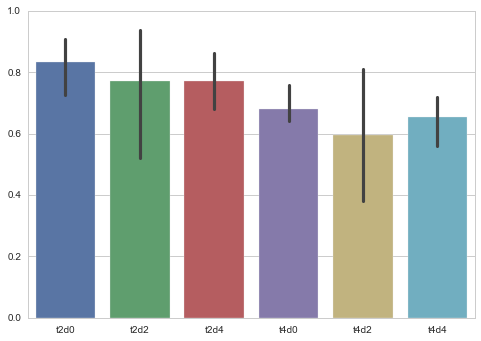

In [132]:
sns.barplot(data=hitChart45c)

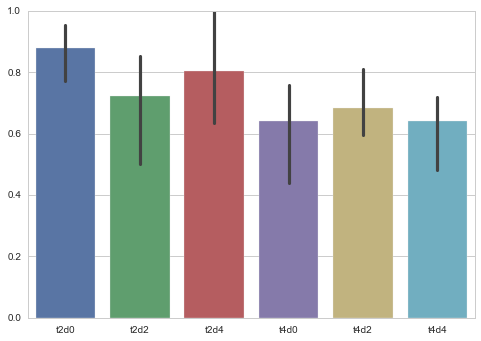

In [134]:
sns.barplot(data=hitChart45uc)